<a href="https://colab.research.google.com/github/anchalchepurwar/ML_pr/blob/main/pr6_bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('WineQT.csv')

# Step 3: Explore the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (1143, 13)

First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0 

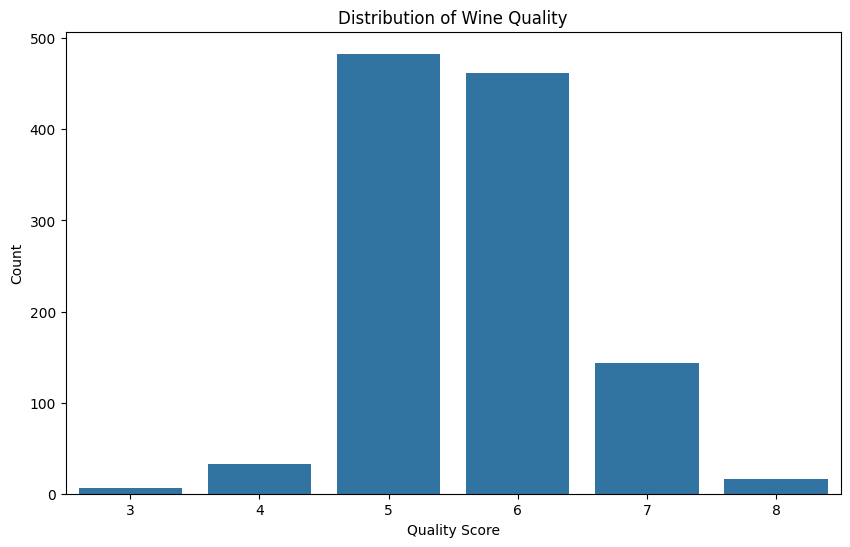

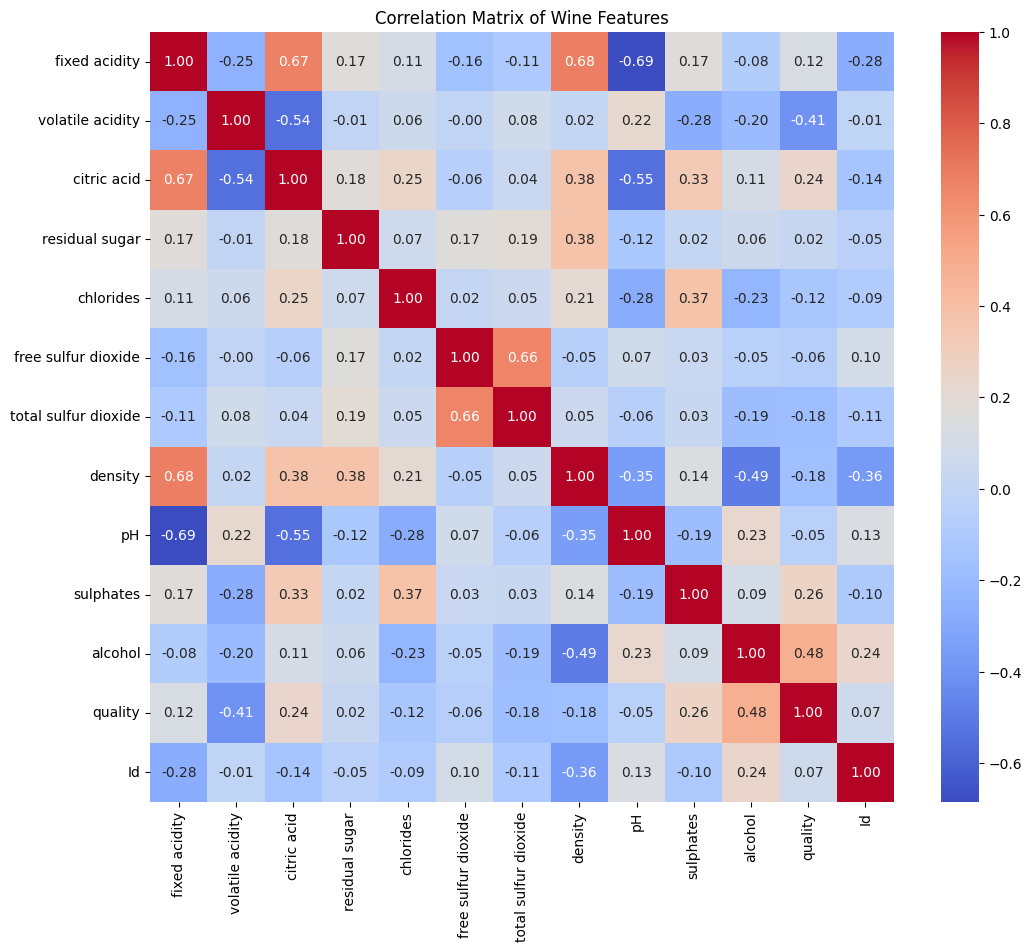

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.show()

In [5]:
X = df.drop('quality', axis=1)
y = df['quality']

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

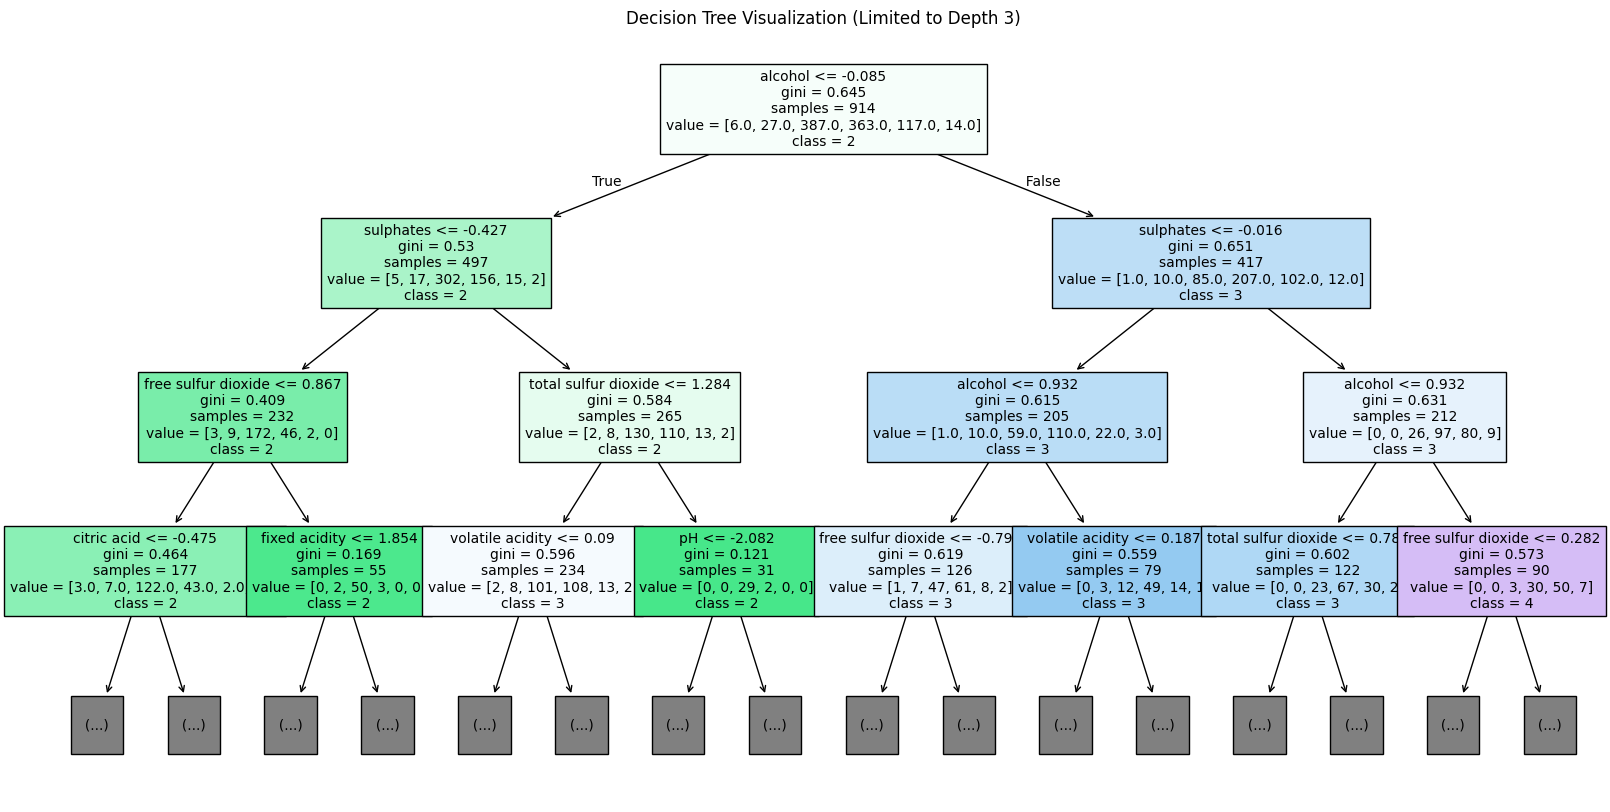

In [7]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=df.columns[:-1],
          class_names=[str(i) for i in range(11)],  # Quality scores from 0 to 10
          filled=True,
          max_depth=3,  # Limit depth for readability
          fontsize=10)
plt.title('Decision Tree Visualization (Limited to Depth 3)')
plt.show()

In [8]:
y_pred = dt_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))



Model Performance Metrics:
Accuracy: 0.5633
Precision: 0.5773
Recall: 0.5633
F1 Score: 0.5644

Detailed Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.40      0.33      0.36         6
           5       0.66      0.66      0.66        96
           6       0.56      0.45      0.50        99
           7       0.43      0.69      0.53        26
           8       0.33      0.50      0.40         2

    accuracy                           0.56       229
   macro avg       0.40      0.44      0.41       229
weighted avg       0.58      0.56      0.56       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

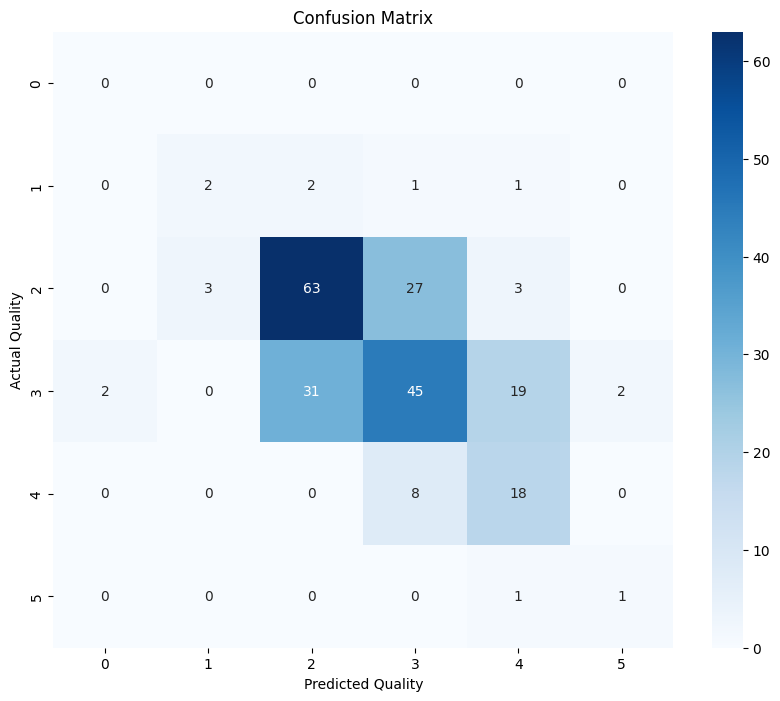

In [9]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.show()


In [10]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:")
print(grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [11]:
best_dt_classifier = grid_search.best_estimator_
y_pred_optimized = best_dt_classifier.predict(X_test)

In [13]:
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized, average='weighted')
recall_opt = recall_score(y_test, y_pred_optimized, average='weighted')
f1_opt = f1_score(y_test, y_pred_optimized, average='weighted')

print("\nOptimized Model Performance Metrics:")
print(f"Accuracy: {accuracy_opt:.4f}")
print(f"Precision: {precision_opt:.4f}")
print(f"Recall: {recall_opt:.4f}")
print(f"F1 Score: {f1_opt:.4f}")

print("\nDetailed Classification Report (Optimized Model):")
print(classification_report(y_test, y_pred_optimized))



Optimized Model Performance Metrics:
Accuracy: 0.5502
Precision: 0.5263
Recall: 0.5502
F1 Score: 0.5364

Detailed Classification Report (Optimized Model):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.64      0.68      0.66        96
           6       0.53      0.58      0.55        99
           7       0.25      0.15      0.19        26
           8       0.00      0.00      0.00         2

    accuracy                           0.55       229
   macro avg       0.28      0.28      0.28       229
weighted avg       0.53      0.55      0.54       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

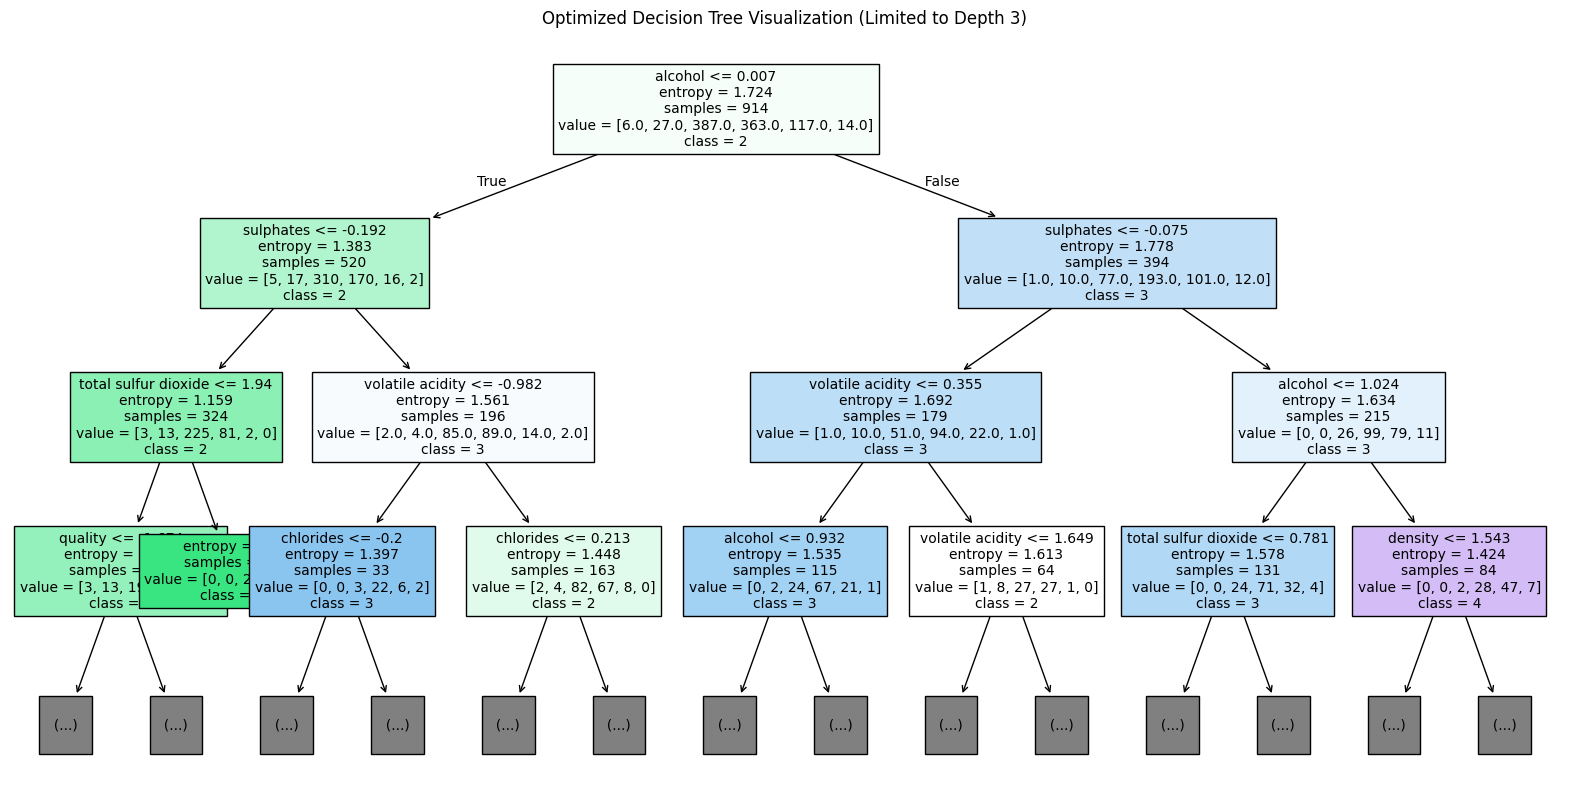

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier,
          feature_names=df.columns[:-1],
          class_names=[str(i) for i in range(11)],  # Quality scores from 0 to 10
          filled=True,
          max_depth=3,  # Limit depth for readability
          fontsize=10)
plt.title('Optimized Decision Tree Visualization (Limited to Depth 3)')
plt.show()


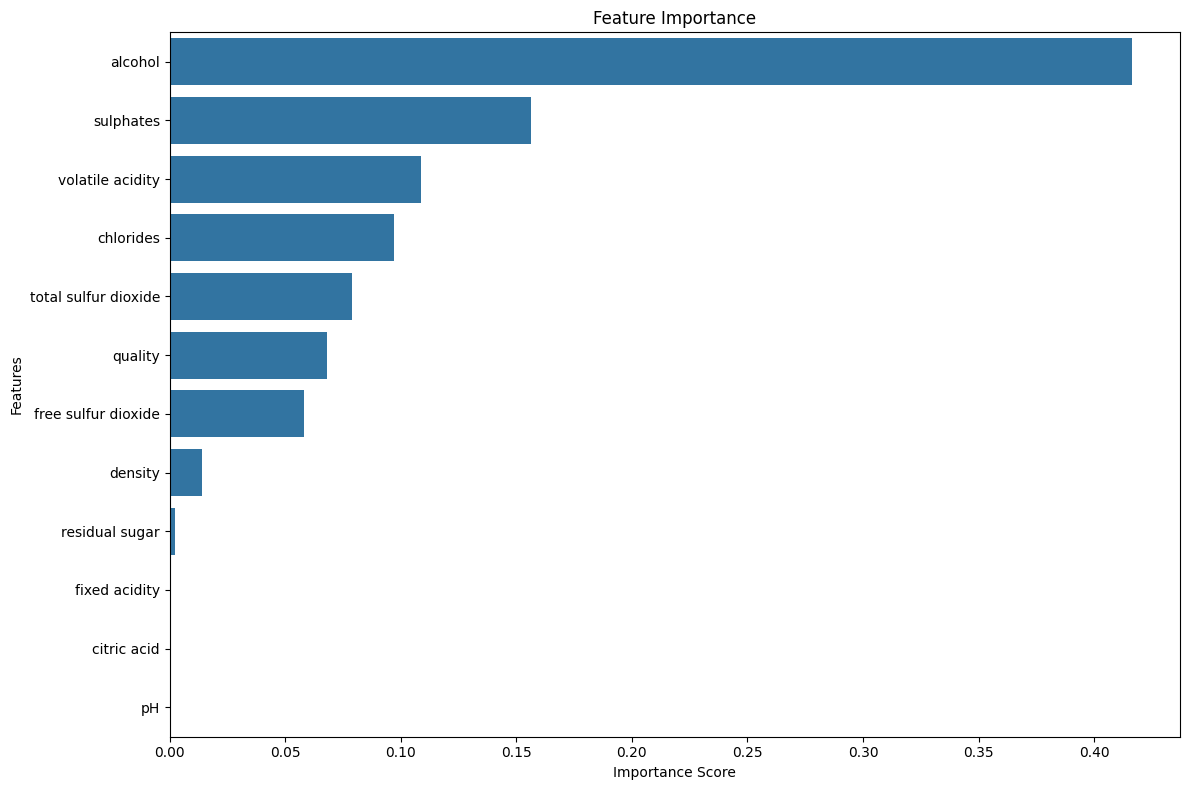

In [15]:
feature_importance = best_dt_classifier.feature_importances_
features = df.columns[:-1]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [16]:
performance_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Base Model': [accuracy, precision, recall, f1],
    'Optimized Model': [accuracy_opt, precision_opt, recall_opt, f1_opt]
})

print("\nPerformance Comparison:")
print(performance_comparison)


Performance Comparison:
      Metric  Base Model  Optimized Model
0   Accuracy    0.563319         0.550218
1  Precision    0.577334         0.526341
2     Recall    0.563319         0.550218
3   F1 Score    0.564395         0.536351


<Figure size 1000x600 with 0 Axes>

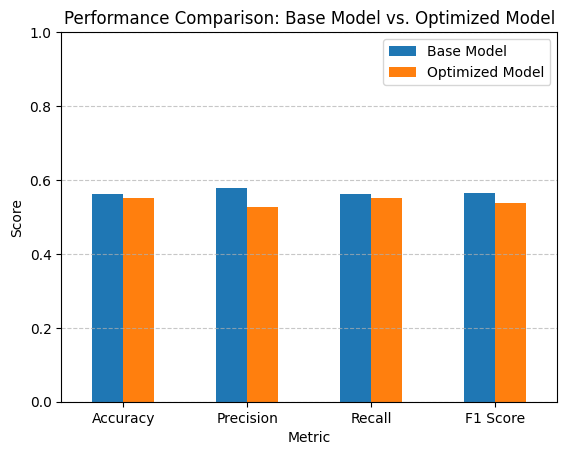

In [17]:
plt.figure(figsize=(10, 6))
performance_comparison.set_index('Metric').plot(kind='bar')
plt.title('Performance Comparison: Base Model vs. Optimized Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()